In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
samples = np.random.normal(size=(2, 250))
samples.shape

(2, 250)

In [3]:
ood_samples_1 = np.random.normal(loc=-4, size=(2, 25))
ood_samples_2 = np.random.normal(loc=4, size=(2, 25))

In [18]:
augment_1 = np.random.normal(loc=2.5, scale=0.5, size=(2, 20))
augment_2 = np.random.normal(loc=2.75, scale=0.5, size=(2, 20))

In [5]:
x_start = -5
x_finish = 5
x = x_start
dots_1 = [[], []]
while x < x_finish:
    dots_1[0].append(x)
    dots_1[1].append(np.sin(x))
    x += 0.001
dots_1 = np.array(dots_1)

dots_1[1] += np.random.normal(loc=0.5, scale=0.01, size=len(dots_1[1]))
dots_1[1][:3436] = -np.sin(dots_1[0][:3436]) - 1.5

In [6]:
x_start = -5
x_finish = 5
x = x_start
dots_2 = [[], []]
while x < x_finish:
    dots_2[0].append(x)
    dots_2[1].append(np.tan(0.3 * x))
    x += 0.001
dots_2 = np.array(dots_2)

dots_2[1] += np.random.normal(loc=0.5, scale=0.001, size=len(dots_2[1]))
print(len(dots_2[0]))
dots_2[1][3500:6500] = dots_1[1][3500:6500]
dots_2[1][:3500] -= 0.5
dots_2[1][6500:] += 0.5

10000


In [7]:
def devide_samples(samples):
    class_0 = [[], []]
    class_1 = [[], []]
    for i in range(len(samples[0])):
        sample = (samples[0][i], samples[1][i])
        if sample[1] > np.sin(sample[0]) + 0.5 + np.random.normal(scale=0.1):
            class_1[0].append(sample[0])
            class_1[1].append(sample[1])
        else:
            class_0[0].append(sample[0])
            class_0[1].append(sample[1])
    return class_0, class_1

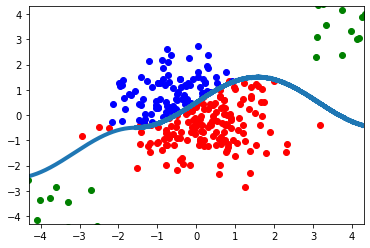

In [8]:
samples_first_class, samples_second_class = devide_samples(samples)
plt.plot(samples_first_class[0], samples_first_class[1], 'ro')
plt.plot(samples_second_class[0], samples_second_class[1], 'bo')
plt.plot(ood_samples_1[0], ood_samples_1[1], 'go')
plt.plot(ood_samples_2[0], ood_samples_2[1], 'go')

plt.xlim(-4.3, 4.3)
plt.ylim(-4.3, 4.3)
plt.plot(dots_1[0], dots_1[1], linewidth=4)
plt.savefig('samples_div_1.pdf')

In [9]:
np.argmin(dots_1[1])

288

In [10]:
dots_1[1][3436]

-0.4953604192707294

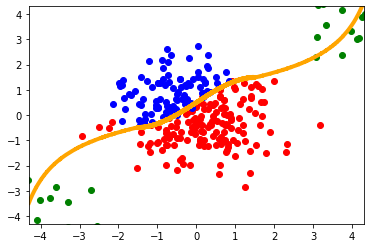

In [11]:
samples_first_class, samples_second_class = devide_samples(samples)
plt.plot(samples_first_class[0], samples_first_class[1], 'ro')
plt.plot(samples_second_class[0], samples_second_class[1], 'bo')
plt.plot(ood_samples_1[0], ood_samples_1[1], 'go')
plt.plot(ood_samples_2[0], ood_samples_2[1], 'go')

plt.xlim(-4.3, 4.3)
plt.ylim(-4.3, 4.3)
plt.plot(dots_2[0], dots_2[1], linewidth=4, c='orange')
plt.savefig('samples_div_2.pdf')

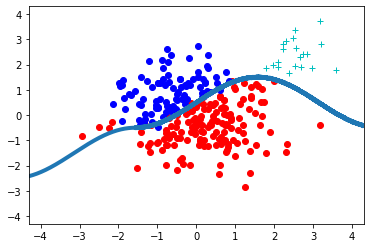

In [21]:
samples_first_class, samples_second_class = devide_samples(samples)
plt.plot(samples_first_class[0], samples_first_class[1], 'ro')
plt.plot(samples_second_class[0], samples_second_class[1], 'bo')
plt.plot(augment_1[0], augment_1[1], 'c+')
#plt.plot(augment_2[0], augment_2[1], 'c+')

plt.xlim(-4.3, 4.3)
plt.ylim(-4.3, 4.3)
plt.plot(dots_1[0], dots_1[1], linewidth=4)
plt.savefig('samples_div_3.pdf')

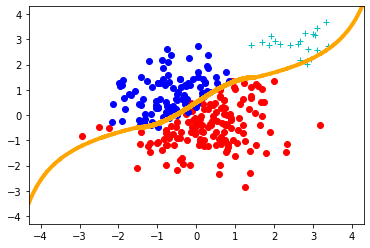

In [22]:
samples_first_class, samples_second_class = devide_samples(samples)
plt.plot(samples_first_class[0], samples_first_class[1], 'ro')
plt.plot(samples_second_class[0], samples_second_class[1], 'bo')
#plt.plot(augment_1[0], augment_1[1], 'c+')
plt.plot(augment_2[0], augment_2[1], 'c+')

plt.xlim(-4.3, 4.3)
plt.ylim(-4.3, 4.3)
plt.plot(dots_2[0], dots_2[1], linewidth=4, c='orange')
plt.savefig('samples_div_4.pdf')